# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Статистика и байесовские классификаторы.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. 
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 30 баллов
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 40 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad9
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups

sns.set(palette='Set2')

---
### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$, рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** $\widehat{\theta}_1 = S^2$ - смещенная оценка; $\widehat{\theta}_2 = \frac{n}{n-1}S^2$ - несмещенная оценка, что следует из пункта b) третьей задачи.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture1_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**


In [4]:
# Функция для вычисления оценки sigma^2 по формуле S^2
def theta_1(sample):
    n = len(sample)
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean)**2) / n

In [3]:
# Функция для вычисления оценки (n / (n - 1)) * S^2
def theta_2(sample):
    n = len(sample)
    sample_mean = np.mean(sample)
    return (n / (n - 1)) * np.sum((sample - sample_mean)**2) / n

In [ ]:
# Вначале:
plt.figure(figsize=<размер>)

# Для каждой оценки:
# y - номер оценки
plt.scatter(<независимые оценки> , np.zeros(k) + y, 
            alpha=0.1, s=100, color=<цвет>, label=<метка>)
plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
plt.title(f'Размер выборки = {n}')
plt.yticks([])
plt.legend()

**Решение:** Пусть $\sigma = 1$, $\sigma^2 = 1$. $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, 1)$. В качестве оценок $\sigma^2$ используется $\widehat{\theta}_1 = S^2$ и $\widehat{\theta}_2 = \frac{n}{n-1}S^2$, где $S^2 = \overline{X^2}-\overline{X}^2$ - это выборочная дисперсия; $\widehat{\theta}_1 = S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$; $\widehat{\theta}_2 = \frac{n}{n-1}S^2=\frac{1}{n-1}\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$; $\overline{X} = \frac1n\sum\limits_{i=1}^n X_i$ - это выборочное среднее.

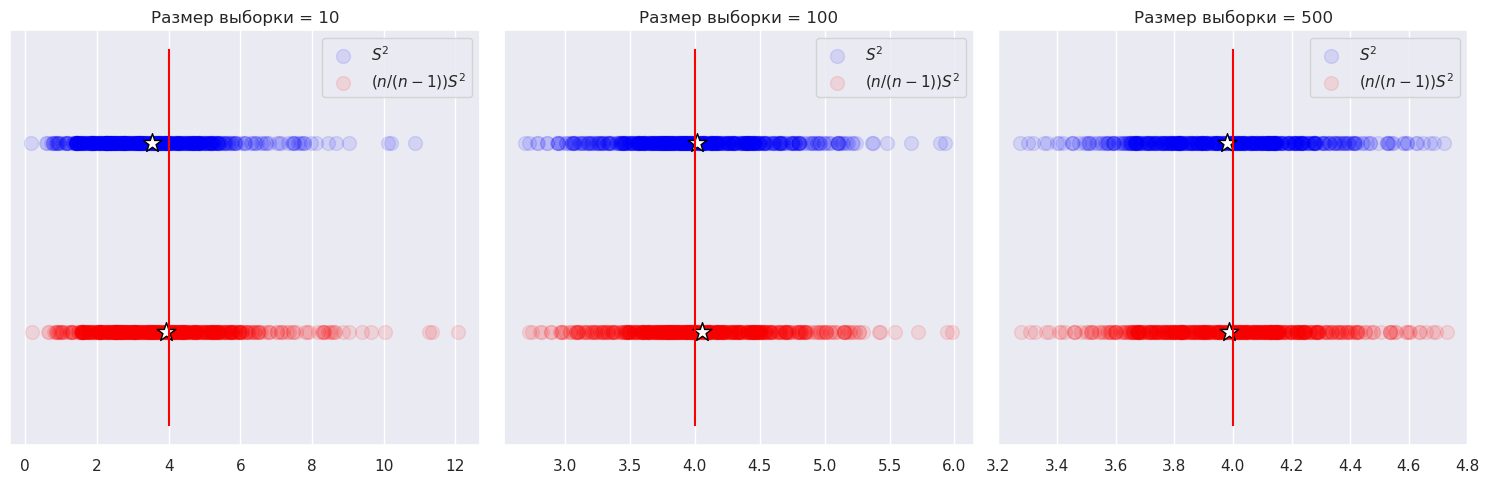

In [6]:
# Параметры эксперимента
sigma = 2
k = 500
n_values = [10, 100, 500]

# Создание фигуры для графиков
plt.figure(figsize=(15, 5))

# Перебор по различным значениям n
for i, n in enumerate(n_values, start=1):
    # Генерация выборок и оценок для каждой выборки
    theta_1_res = []
    theta_2_res = []
    for j in range(k):
        sample = np.random.normal(loc=0, scale=sigma, size=n)
        theta_1_res.append(theta_1(sample))
        theta_2_res.append(theta_2(sample))
    
    # Вычисление средних оценок
    theta_1_mean = np.mean(theta_1_res)
    theta_2_mean = np.mean(theta_2_res)
    
    # Визуализация оценок и их средних значений
    plt.subplot(1, 3, i)
    plt.scatter(theta_1_res, np.zeros(k) + 0.1, alpha=0.1, s=100, color='blue', label='$S^2$')
    plt.scatter(np.mean(theta_1_res), 0.1, marker='*', s=200, color='w', edgecolors='black')
    
    plt.scatter(theta_2_res, np.zeros(k) - 0.1, alpha=0.1, s=100, color='red', label='$(n / (n - 1)) S^2$')
    plt.scatter(np.mean(theta_2_res), -0.1, marker='*', s=200, color='w', edgecolors='black')
    
    plt.vlines(sigma**2, -0.2, 0.2, color='r')
    plt.title(f'Размер выборки = {n}')
    plt.yticks([])
    plt.legend()

# Отображение графиков
plt.tight_layout()
plt.show()

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

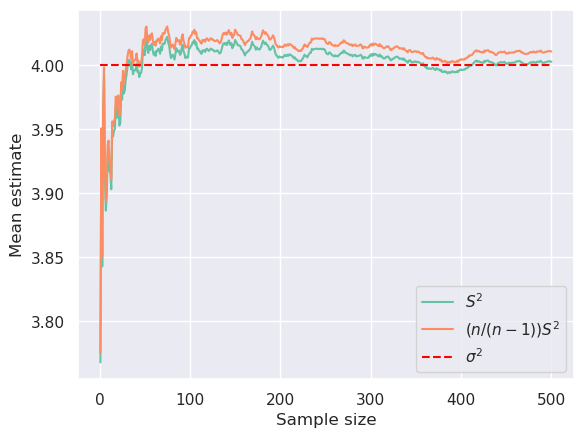

In [8]:
sigma = 2
k = 500
n_max = 500

# Генерация выборок большого размера
samples = np.random.normal(loc=0, scale=sigma, size=(k, n_max))

# Вычисление оценок для каждой выборки
theta_first = np.apply_along_axis(theta_1, 1, samples)
theta_second = np.apply_along_axis(theta_2, 1, samples)

# Вычисление средних оценок
theta_first_mean = np.mean(theta_first)
theta_second_mean = np.mean(theta_second)

# Построение графика зависимости среднего оценок от размера выборки
plt.plot(range(1, n_max + 1), np.cumsum(theta_first) / np.arange(1, n_max + 1), label='$S^2$')
plt.plot(range(1, n_max + 1), np.cumsum(theta_second) / np.arange(1, n_max + 1), label='$(n / (n - 1)) S^2$')
plt.hlines(sigma**2, 1, n_max, colors='r', linestyles='dashed', label='$\sigma^2$')
plt.xlabel('Sample size')
plt.ylabel('Mean estimate')
plt.legend()
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? 

*Для ПМФ:* поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:**  Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Какое бы ни оказалось истинное значение параметра $\theta$, рассматривая оценку $\widehat{\theta}$, в среднем будем получать именно $\theta$.

Из графика зависимости среднего значения оценок от размера выборки видно, что как для оценки $S^2$, так и для оценки $(n / (n - 1))S^2$, среднее значение оценки приближается к истинному значению параметра $\sigma^2$ с ростом размера выборки. Это подтверждает свойство несмещенности второй оценки, но и у первой как будто бы это свойство есть, хотя теоритический это стоит проверить.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

---
### Задача 3.

Рассмотрим задачу построения системы, автоматически классифицирующей поступающие новостные сюжеты на несколько заранее заданных категорий.
 
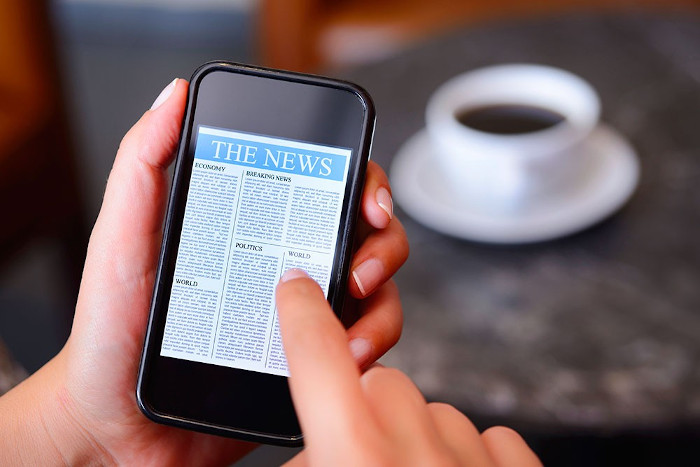



Перед выполнением задачи обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [3]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [10]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [11]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [12]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Разделите данные на обучающую, валидационную и тестовую части

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_val, y_train, y_val = train_test_split(data_train['data'], data_train['target'], test_size=0.2, random_state=random_state)
X_test, y_test = data_test['data'], data_test['target']

Прежде чем приступать к построению сложных систем всегда стоит выбрать простой бейзлайн &mdash; модель, которую вы можете получить относительно быстро, и она не занимает много ресурсов.

В качестве бейзлайна рассмотрим простую модель, обученную на представлении текстов в виде мешка слов (bag of words). Мы можем обучить два известных нам классификатора:
* метод ближайших соседей,
* наивный байесовский классификатор.

Подумайте, почему метод ближайших соседей не подходит для решения данной задачи.

Причины по которым kNN может не подходить:
1. При представлении текстов в виде мешка слов (bag of words) каждый документ представляется вектором, где каждый элемент соответствует отдельному слову из словаря. Таким образом, такие векторы могут быть крайне разреженными, особенно при большом размере словаря. Это приводит к тому, что большинство соседей в kNN будут далеки от текущего документа в многомерном пространстве, что делает расстояние между ними неинформативным.
2. kNN работает на основе расстояний между объектами в пространстве признаков. Однако тексты могут иметь различные длины, что может повлиять на расстояние между ними и усложнить интерпретацию расстояний.

Обучите наивный байесовский классификатор, подобрав также для него оптимальные гиперпараметры. В качестве гиперпараметров можно рассмотреть, например, параметры мешка слов.

Для выполнения этой процедуры зафиксируйте несколько комбинаций значений гиперпараметров, для каждой из них обучите модель по обучающей части выборки и посчитайте качество (точность классификации) на валидационной части. Выберите классификатор, дающий максимальную точность.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

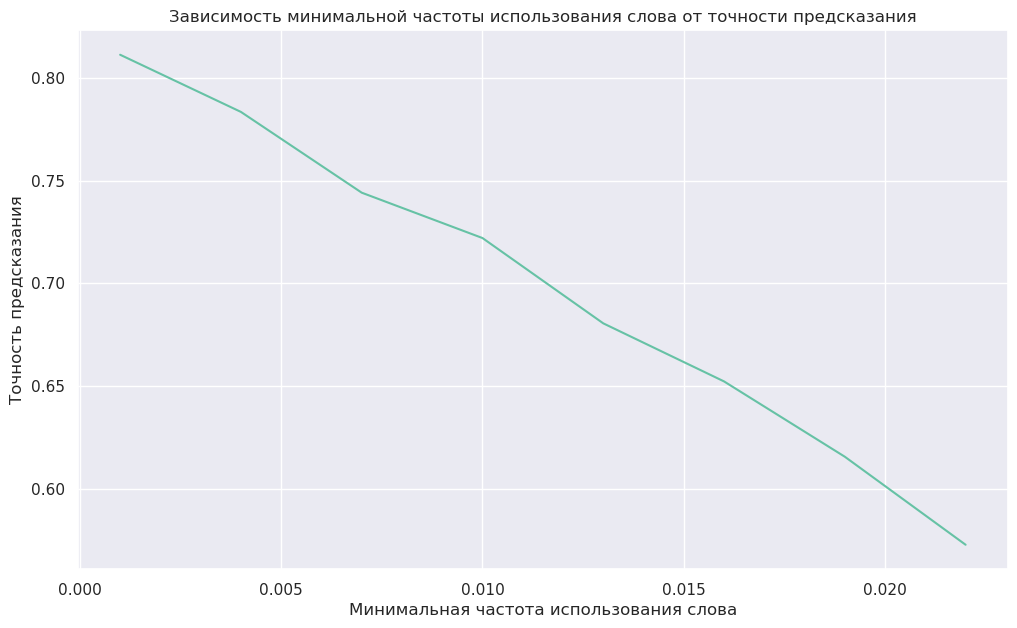

In [7]:
res = {}
for i in np.arange(0.001, 0.025, 0.003):
    vectorizer = CountVectorizer(min_df=i, max_df=0.07)
    vec_data_train = vectorizer.fit_transform(X_train).toarray()
    vec_data_valid = vectorizer.transform(X_val)
    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(vec_data_train, y_train)
    predictions = multinomial_nb.predict(vec_data_valid)
    res[i] = accuracy_score(y_val, predictions)

plt.figure(figsize=(12,7))
plt.title('Зависимость минимальной частоты использования слова от точности предсказания')
plt.xlabel('Минимальная частота использования слова')
plt.ylabel('Точность предсказания')
sns.lineplot(x=res.keys(), y=res.values())
plt.show()


значит min_df долждны выбрать как можно маленьким

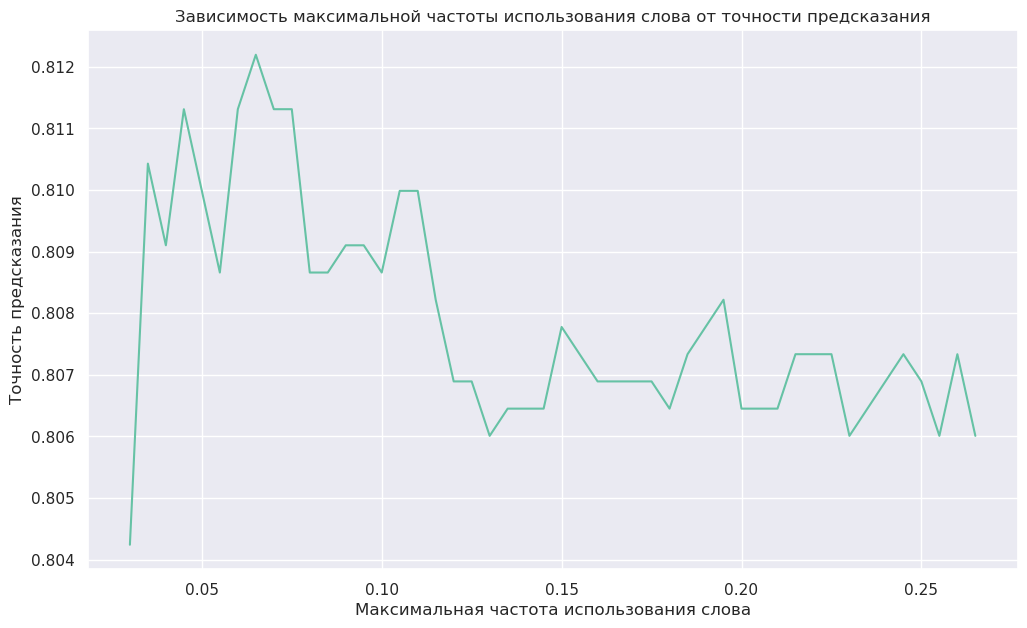

In [11]:
res2 = {}
for i in np.arange(0.03, 0.27, 0.005):
    vectorizer = CountVectorizer(min_df=0.001, max_df=i)
    vec_data_train = vectorizer.fit_transform(X_train).toarray()
    vec_data_valid = vectorizer.transform(X_val)
    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(vec_data_train, y_train)
    predictions = multinomial_nb.predict(vec_data_valid)
    res2[i] = accuracy_score(y_val, predictions)

plt.figure(figsize=(12,7))
plt.title('Зависимость максимальной частоты использования слова от точности предсказания')
plt.xlabel('Максимальная частота использования слова')
plt.ylabel('Точность предсказания')
sns.lineplot(x=res2.keys(), y=res2.values())
plt.show()

Посчитайте качество на тестовой выборке.

In [12]:
mx = list(res2.keys())[list(res2.values()).index(max(res2.values()))]
mx

0.06499999999999997

Как мы видим лучшая точность на валидационной достигается при max_df=0.065

In [ ]:
vectorizer = CountVectorizer(min_df=0.0005, max_df=mx)
vec_data_train = vectorizer.fit_transform(data_train['data']).toarray()
vec_data_test = vectorizer.transform(data_test['data'])
multinomial_nb = MultinomialNB()
multinomial_nb.fit(vec_data_train, data_train['target'])
predictions = multinomial_nb.predict(vec_data_test)


In [2]:
print(f'Точность: {accuracy_score(data_test["target"], predictions):.3f}')

Точность: 0.733


Выберите некоторую нейросеть для классификации текстов. Вы можете выбрать готовую нейросеть и дообучить ее на рассматриваемых данных, как это сделано на <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">семинаре</a>, так и самостоятельно написать нейросеть.

Сравните качество моделей на тестовой выборке. Можно ли с уверенностью утверждать, что одна из моделей лучше другой?

Сделайте выводы. Данный эксперимент показал, что построенный наивный байесовский классификатор новостных сюжетов на тематические группы на тестовой выборке выдал 73% точности. При увеличении числа слов, которые мы рассматриваем для построения классификтора, точность увеличивается до max_df=0.07, потом начинают появлятся слова, которые присутствуют во всех статьях, снижающие точность предсказаний.

---
### Задача 4.

Пусть $\mathscr{X} = \mathbb{R}^d$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ (QDA), в котором условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Разделяющей поверхностью между классами $k$ и $\ell$ называется множество точек пространства признаков, для которых вероятность этих двух классов одинакова. 

**1.**
Покажите, что в модели QDA разделяющие поверхности в общем случае квадратичны, а в LDA &mdash; линейны между любыми двумя классами.

*Примечание.* В LDA предполагается $\Sigma_1 = ... = \Sigma_k$.

**2.**
Рассмотрим квадратичный дискриминантный анализ при $d=2$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

*Примечание.* Можно подобрать выборку, посчитать оценки со страшными числами. Но еще лучше &mdash; немного подумать и привести пример с "красивыми" числами без какого-либо подбора выборки. В данном случае это довольно просто, а также позволяет лучше разобраться в параметрах многомерного нормального распределения.


**1.** 

В QDA для класса $k$ условное распределение признаков $X$ задается многомерным нормальным распределением $\mathcal{N}(a_k, \Sigma_k)$, где $a_k$ — вектор средних, а $\Sigma_k$ — матрица ковариации. Разделяющая поверхность между классами $k$ и $\ell$ определяется уравнением
$$
p(X|Y=k) = p(X|Y=\ell),
$$
где $p(X|Y=k)$ — плотность распределения признаков $X$ при условии $Y=k$.

Если матрицы ковариации $\Sigma_k$ различны для разных классов, то уравнение $p(X|Y=k) = p(X|Y=\ell)$ в общем случае задает квадратичную поверхность, так как оно является квадратичным по $X$.

В линейном дискриминантном анализе (LDA) предполагается, что все классы имеют одинаковую матрицу ковариации $\Sigma_k = \Sigma$. В этом случае уравнение $p(X|Y=k) = p(X|Y=\ell)$ становится линейным по $X$, так как квадратичные члены в $X$ упрощаются, и разделяющая поверхность становится плоскостью.



**2.**
* Гипербола: Пусть для классов $k$ и $\ell$ матрицы ковариации $\Sigma_k$ и $\Sigma_{\ell}$ равны диагональным матрицам с ненулевыми элементами на диагонали, но различными знаками. Например, $\Sigma_k = \text{diag}(2, 1)$ и $\Sigma_{\ell} = \text{diag}(1, 2)$, а средние $a_k$ и $a_{\ell}$ могут быть выбраны как угловые точки второго и четвертого квадранта соответственно. Вероятности $\pi_k$ и $\pi_{\ell}$ могут быть выбраны произвольно.
* Парабола: Пусть для классов $k$ и $\ell$ матрицы ковариации $\Sigma_k$ и $\Sigma_{\ell}$ равны одинаковым диагональным матрицам с нулевыми элементами на диагонали, а средние $a_k$ и $a_{\ell}$ лежат на одной прямой. Например, $\Sigma_k = \Sigma_{\ell} = \text{diag}(1, 1)$, а $a_k$ и $a_{\ell}$ могут быть выбраны как точки на оси $x$ или $y$. Вероятности $\pi_k$ и $\pi_{\ell}$ выбираем случайно.
* Две параллельные прямые: 
Пусть $\pi_1 = 0.5$, $\pi_2 = 0.5$, $a_1 = (0,0)^T$, $a_2 = (1,1)^T$, $\Sigma_1 = \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix}$, $\Sigma_2 = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$.

* Две пересекающиеся прямые: 